##Runup and Reverse Shoaling Calculations

###  Reverse Shoaling
Reverse shoaling is used to estimate deepwater wave height Ho from wave heights measured at intermediate depths equal to, or deeper than, the breaking depth hb.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
g = 9.81
pi = np.pi

In [95]:
def qkhfs( wa, ha ):
    """
    Quick iterative calculation of kh in gravity-wave dispersion relationship
    kh = qkhfs(wa, ha )
    
    Vectorized version requires arrays as input, even if only point.
    
    Input
        w - array of angular wave frequencies = 2*pi/T where T = wave period [1/s]
        h - array of water depths [m]
    Returns
        kh - [len(wa), len(ha)] array of wavenumber * depth [ ]

    Orbital velocities from kh are accurate to 3e-12 !

    RL Soulsby (2006) \"Simplified calculation of wave orbital velocities\"
    HR Wallingford Report TR 155, February 2006
    Eqns. 12a - 14
    """
    tanh = np.tanh
    wa = np.array(wa)
    ha = np.array(ha)
    g = 9.81
    ni = len(np.atleast_1d(wa))
    nj = len(np.atleast_1d(ha))
    kh = np.ones((ni,nj))
    print 'wa:',type(wa), np.shape(wa), len(wa)
    print 'ha:',type(ha), np.shape(ha), len(ha)
    print 'kh:',type(kh), np.shape(kh), len(kh)
    for j in range(nj):
        for i in range(ni):
            x = wa[i]**2.0 *ha[j]/g
            y = np.sqrt(x) * (x<1.) + x *(x>=1.)
            # is this faster than a loop?
            t = tanh( y )
            y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
            t = tanh( y )
            y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
            t = tanh( y )
            y = y-( (y*t -x)/(t+y*(1.0-t**2.0)))
            kh[i,j] = y
    return kh

Deepwater wavelength Lo =  224.828638809  m
Irribarren number =  1.19954294979 1.19954294979
wa: <type 'numpy.ndarray'> (1L,) 1
ha: <type 'numpy.ndarray'> (50L,) 50
kh: <type 'numpy.ndarray'> (1L, 50L) 1
(50L,) (50L,) (50L,)


(0.9, 2.2)

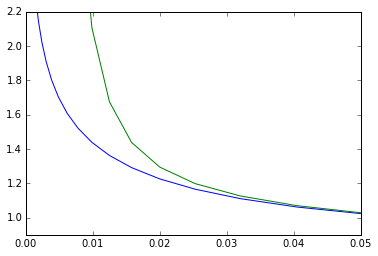

In [100]:
T = 12. # wave period (s)
Bf=.08 # beach steepness in foreshore ()
Ho = 1. # deepwater wave height (m)
gam = 0.55 # Ratio height to depth at breaking Hb/hb. Could 0.78.
Lo = g*T*T/(2.*pi)
I = Bf*(np.sqrt(Lo/Ho))
print 'Deepwater wavelength Lo = ',Lo,' m'
print 'Irribarren number = ',I,I2
eta = 0.35*Bf*np.sqrt(Ho*Lo)
Sinc = 0.75*Bf*np.sqrt(Ho*Lo)
SIG = 0.06*np.sqrt(Ho*Lo)
R2 = 1.1*(eta*0.5*np.sqrt(Sinc**2+SIG**2)) #Eqns 6 and 7
h = np.logspace(-2, 3., 50)
w = 2.*pi/T
ko = 2*pi/Lo
wa = np.array([w])
kh = np.squeeze(qkhfs( wa, h ))
Cgo = 0.5*g*T/(2*pi)
n = 0.5+kh/np.sinh(2.*kh)
Cg = n*g*T/(2.*pi)
Ks = 1./ np.sqrt( np.tanh(kh)*(1.+2*kh/np.sinh(2*kh)) )
Ksb = (4.*ko*h)**(-1./4.) * (1.+0.25*ko*h+(13./228.)*(ko*h)**2.)*(1.+(3./8.)*(Ho/Lo)**1.5*(ko*h)**(-3.))
print np.shape(h), np.shape(Ks), np.shape(Ksb)
plt.plot(h/Lo,Ks)
plt.plot(h/Lo,Ksb)
plt.xlim((0.,.05))
plt.ylim((.9,2.2))

In [99]:
eta = 0.35*Bf*np.sqrt(Ho*Lo)
Sinc = 0.75*Bf*np.sqrt(Ho*Lo)
SIG = 0.06*np.sqrt(Ho*Lo)
R2 = 1.1*(eta*0.5*np.sqrt(Sinc**2+SIG**2)) #Eqns 6 and 7